In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import mean

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement

In [10]:
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

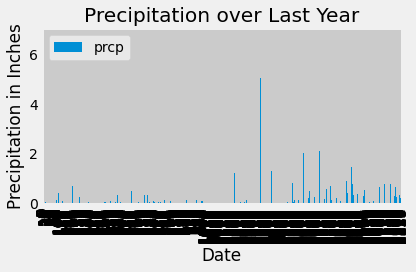

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_prcp_1year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23')
#     order_by(Measurement.date.desc()).all()

date_prcp_1year_df = pd.DataFrame(date_prcp_1year)
# date_prcp_1year_df.plot.bar(title="Past Year Precipitation")
date_prcp_1year_df.plot(kind='bar', title = "Precipitation over Last Year")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.tight_layout()
plt.savefig("Images/exploratory_data.png")

In [31]:
import datetime as dt
print(dt.date(2010, 1 , 1))

2010-01-01


In [32]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date a Year Ago from Last Point in Database: ", year_ago)

Date a Year Ago from Last Point in Database:  2016-08-23


In [36]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

date_prcp = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

date_prcp_df = pd.DataFrame(date_prcp).set_index('date')
date_prcp_df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


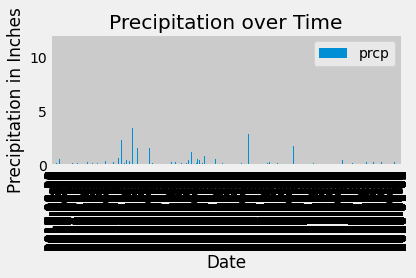

In [37]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(kind='bar', title = "Precipitation over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.tight_layout()
plt.savefig("Images/exploratory_data.png")

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [39]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station)
total_stations.count()

9

In [40]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

print(total_stations)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [41]:
total_stations_all = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
    order_by(Station.id.asc()).all()

total_stations_all_df = pd.DataFrame(total_stations_all)
total_stations_all_df


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [42]:
total_measurements = session.query(Measurement)
print(total_measurements)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [43]:
total_measurements = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.id.asc()).all()

total_measurements_df = pd.DataFrame(total_measurements)
total_measurements_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [44]:
merge_data = pd.merge(total_measurements_df,total_stations_all_df, how='left',on='station' )

merge_data.head()

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [45]:
# Calculate the most active station

merge_data_station = merge_data.groupby("station").count()
merge_data_station.sort_values('date', ascending=False)

,id_x,date,prcp,tobs,id_y,name,latitude,longitude,elevation
station,,,,,,,,,
USC00519281,2772,2772,2772,2772,2772,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724,2724,2724,2724,2724,2724
USC00513117,2709,2709,2696,2709,2709,2709,2709,2709,2709
USC00519523,2669,2669,2572,2669,2669,2669,2669,2669,2669
USC00516128,2612,2612,2484,2612,2612,2612,2612,2612,2612
USC00514830,2202,2202,1937,2202,2202,2202,2202,2202,2202
USC00511918,1979,1979,1932,1979,1979,1979,1979,1979,1979
USC00517948,1372,1372,683,1372,1372,1372,1372,1372,1372
USC00518838,511,511,342,511,511,511,511,511,511


In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
merge_data_sdt1 = merge_data[['station', 'date','tobs']]
merge_data_sdt1 = merge_data_sdt1.set_index('station')
merge_data_sdt1 = merge_data_sdt1.loc[['USC00519281'],['tobs','date']]
merge_data_sdt1.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


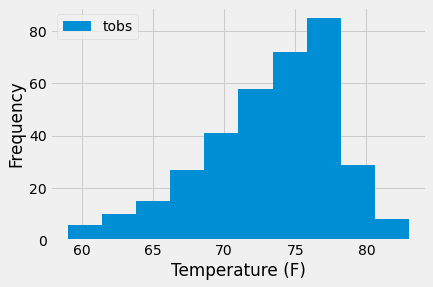

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
merge_data_sdt = merge_data[['station', 'date','tobs']]
merge_data_sdt = merge_data_sdt.loc[merge_data_sdt['date']>'2016-08-23']
merge_data_sdt = merge_data_sdt.set_index('station')
merge_data_sdt = merge_data_sdt.loc[['USC00519281'],['tobs','date']]
merge_data_sdt = merge_data_sdt[['date','tobs']]
merge_data_sdt.plot(kind="hist")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.savefig("Images/past_year_temp_observed.png")

## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-03-01', '2017-03-15'))

[(62.0, 71.1086956521739, 82.0)]


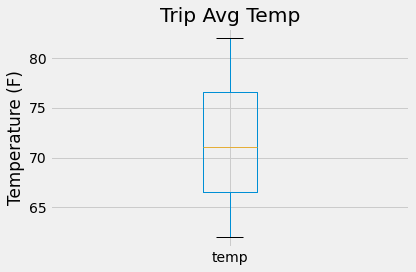

In [51]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# print(calc_temps('2017-02-28', '2017-03-05'))
bar_chart_data = calc_temps('2017-03-01', '2017-03-15')

bar_chart_data_df = pd.DataFrame({"temp":[62.0, 71.1086956521739, 82.0]})
bar_chart_data_df.plot.box(title='Trip Avg Temp')
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.savefig("Images/box_plot_temp.png")

In [52]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


def calc_prcp(start_date, end_date):

    return session.query(Measurement.station, Measurement.date, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

vacation_prcp = calc_prcp('2017-03-01', '2017-03-15')
vacation_prcp
vacation_prcp_df = pd.DataFrame(vacation_prcp).groupby("name").sum().sort_values('prcp')

vacation_prcp_df


,prcp,latitude,longitude,elevation
name,,,,
"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.75,215.21300,-1578.37400,70.0
"WAIMANALO EXPERIMENTAL FARM, HI US",2.32,256.02672,-1892.53668,234.0
"WAIKIKI 717.2, HI US",2.74,319.07400,-2367.25200,45.0
"PEARL CITY, HI US",3.04,235.32740,-1737.72610,130.9
"MANOA LYON ARBO 785.2, HI US",3.50,298.66340,-2209.23500,2133.6
"WAIHEE 837.5, HI US",5.46,321.77505,-2367.73335,493.5
"KANEOHE 838.1, HI US",5.76,321.35100,-2367.02250,219.0


In [53]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("03-01")

[(64.0, 70.0327868852459, 76.0)]

In [54]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

date= ("01-01")
# ,"01-01","01-01","01-01","01-01","01-01","01-07","03-08","03-09","03-10","03-11","03-12","03-13","03-14","03-15")

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals(date)

[(62.0, 69.15384615384616, 77.0)]

In [55]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
